# HW6 due 5p Fri May 14, 2021

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.
You can do the Group work portion in class with your classmates on Wednesdays to get full credit, but you can choose to do that portion individually and submit it along with your hw for a grade (i.e. you will not automatically get full credit). 

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your submission.

You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup.

**Important:** before you do any work in the Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

**Also important:** To produce a .pdf for submission to Canvas, click "File -> Print" (or press Ctrl/Cmd + P), and choose "Save to PDF" or "Microsoft Print to PDF" as your printer.

# Group work -- Wed May 12

I encourage you to attend the group work session on Wednesdays to complete the group work portion of your homework -- you will get full credit as long as you participate and make an effort on the problem. This is also a great opportunity to get to know your classmates. Only one person needs to submit.

Please note that only one person can edit the Colaboratory notebook at a time, I recommend creating a copy for yourself and copy pasting your solutions in the discord or Zoom chat if people want to work on different parts of the writeup.

## 0. Groupmates: [Names of everyone in your group]

## 1. [15 min]:  sensors and systems (don't have to do if submitting individually), ungraded

Pick a system/plant/process to discuss. What types of sensors are available to observe your states, and why are some of them more or less desirable to be implemented in real life? Please briefly summarize your discussion points and submit. 

## 2. state and output feedback

***Purpose:*** apply analytical and computational techniques to observe and control the state of a system.

Consider the following model of a robot arm that consists of a rigid rod of length $\ell$ attached to a point mass $m$ at one end and a rotational joint at the other end,

$$ \ m \ell^2 \ddot{\theta} = m g \ell \sin\theta - \gamma\dot{\theta} + \tau, $$

where 
$\gamma$ is a coefficient of friction for the rotational joint 
and 
$\tau$ is a torque applied by a motor attached to the rotational joint.

With state $x = (\theta,\dot{\theta})$ and input $u = \tau$, linearizing the dynamics around the vertical equilibrium $x_e = (\theta_e,\dot{\theta}_e) = (0,0)$, $u_e = \tau_e = 0$ yields the linear control system

$$ \dot{\delta x} = A \delta x + B \delta u $$

where $x \approx x_e + \delta x$, $u \approx u_e + \delta u$,

$$
A = \left[\begin{matrix} 0 & 1 \\ \frac{g}{\ell} & -\frac{\gamma}{m\ell^2} \end{matrix}\right], \ 
B = \left[\begin{matrix} 0 \\ \frac{1}{m\ell^2} \end{matrix}\right].
$$

a. Design a linear state-feedback law $\delta u = - K \delta x$ that gives a closed-loop characteristic polynomial $s^2 + 2\zeta\omega s + \omega^2$ that corresponds to a second-order system that is ***overdamped*** ($\zeta = 3/2$) and has ***natural frequency*** $\omega = 2$Hz (refer to group work 4 for a quick overview of what overdamped means).

---
**SOLUTION**

To solve this problem, first we will determine the closed-loop system that results from the feedback transformation $\delta u = -K\delta x$. Then, we will use the characteristic polynomial to determine the relationship between the feedback gains of $K$ and the parameters $\zeta, \omega$. 

Let $K = [k_1, k_2]$. Then the closed-loop system has the statespace representation

$$
\delta \dot{x} = (A-BK)\delta x = 
\left[

\begin{array}{cc}
0 & 1 \\ \cfrac{g}{l}-\cfrac{k_1}{ml^2} & \cfrac{-\gamma-k_2}{ml^2}
\end{array}

\right]\delta x.
$$

The characteristic polynomial is given by the determinant of $\lambda I - (A-BK)$, which provides

$$
 \lambda^2 + \left(\cfrac{k_2+\gamma}{ml^2}\right)\lambda - \cfrac{g}{l}+\cfrac{k_1}{ml^2} .
$$

We seek to equate the characteristic polynomial with 

$$ s^2 + 2\omega\zeta s + \omega^2 $$

hence,

$$ k_1 = ml^2\left(\omega^2+\cfrac{g}{l}\right)$$

$$ k_2 = (2\zeta\omega)(ml^2)-\gamma$$

Finally, with $\omega = 2$ and $\zeta = \cfrac{3}{2}$ we have

$$ k_1 = 4 ml^2 + mgl $$

$$ k_2 = 6 ml^2 - \gamma $$

---

b. Verify that the `ctrl.place` command gives the same answer as (a.) when you use parameter values $m = 1$ kg, $\ell = 1$ m, $g = 9.81$ m sec$^{-2}$, $\gamma = 1$.

c. Implement a simulation of the closed-loop system using parameter values from (b.) to verify that the closed-loop dynamics are as expected.


In [ ]:
# part b SOLUTION
import numpy as np 
import control as ctrl

A = np.array([[0,1],[9.81, -1]])
B = np.array([[0,1]]).T

omega = 2.
zeta = 3./2.

# calculate location of poles from quadratic formula
p = [
(-2*zeta*omega + np.sqrt((2*zeta*omega)**2-4*omega**2+0j))/2.,
    (-2*zeta*omega - np.sqrt((2*zeta*omega)**2-4*omega**2+0j))/2.
]

# place poles using ctrl.place
K = ctrl.place(A,B,p)
print(K)

# compare to hand solutions
k1 = 4.+9.81
k2 = 6.-1
print([[k1, k2]])

[[13.81  5.  ]]
[[13.81, 5.0]]


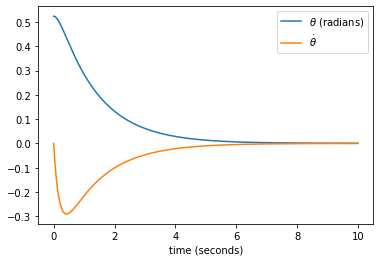

In [ ]:
# part c solutions (run part b first!)
%matplotlib inline
from matplotlib import pyplot as plt 

# closed-loop A matrix
A_CL = A-np.dot(B,K)

# time domain simulation
dt = .01
t = np.linspace(0.,10.,1001)
x = np.zeros((2,len(t)))
x[:,0] = [np.pi/6,0] # a random initial condition

for i in range(1,len(t)):
    x[:,[i]] = x[:,[i-1]]+dt*np.dot(A_CL,x[:,[i-1]])

plt.plot(t,x[0,:],label="$\\theta$ (radians)")
plt.plot(t,x[1,:],label="$\\dot{\\theta}$")
plt.xlabel('time (seconds)')
plt.legend()


### * end of group work -- download as PDF and submit as part of group assignment *

# 0. [preferred name]; [preferred pronouns]

a. Approximately how many hours did you spend on this assignment?

b. Were there specific problems that took much longer than others?

c. What class meeting(s) did you participate in this week?

d. What timezone(s) were you working in this week?

**e. Please fill out the midquarter evaluation for 1 extra credit point: https://uw.iasystem.org/survey/240130**

## 1. state and output feedback cont.

This is a continuation of the state and output feedback problem from the group work above. Use the model and all other information from the group work to do this problem.

Suppose you have to control the system using a distance sensor attached to the mass so that the output is

$$ y = \ell\sin\theta. $$

a. Linearize the output equation at the vertical equilibrium, that is, evaluate 

$$ C = \left.\frac{\partial y}{\partial x} \right|_{x_e,u_e},\ D = \left.\frac{\partial y}{\partial u} \right|_{x_e,u_e} $$

so that $y \approx \delta y = C \delta x + D \delta u$ near the equilibrium.

**Solution:**
$$ C = \left.\frac{\partial y}{\partial x} \right|_{x_e,u_e},\ D = \left.\frac{\partial y}{\partial u} \right|_{x_e,u_e} $$

so that $y \approx \delta y = C \delta x + D \delta u$ near the equilibrium.

$$\fbox{$C = \frac{\partial y}{\partial x}|_{x=x_e, u=u_e}=\left[\begin{matrix}\ell cos\theta & 0 \end{matrix}\right]|_{x=x_e, u=u_e} = \left[\begin{matrix}\ell  & 0 \end{matrix}\right]$}$$

$$\fbox{$D = \frac{\partial y}{\partial u}|_{x=x_e, u=u_e}=0$}$$

------------------------------------------------

b. Design a linear observer

$$ \dot{\delta\widehat{x}} = A \delta\widehat{x} + B \delta u - L(\delta y - \delta\widehat{y}),\ \delta\widehat{y} = C \delta\widehat{x} + D \delta u $$

so that the error dynamics $\dot{e} = (A + LC) e$ has characteristic polynomial $s^2 + 2\xi\sigma s + \sigma^2$ that corresponds to a second-order system that is ***underdamped*** ($\xi = 1/2$) and has ***natural frequency*** $\sigma = 10$Hz

**Solution:**


To determine the characteristic polynomial of the error dynamics, let's compute $a(s)=det(sI-(A-LC))$.

First compute $LC$ where $L=\left[\begin{matrix} l_1 \\ l_2 \end{matrix}\right]$

$$LC = \left[\begin{matrix} l_1 \\ l_2 \end{matrix}\right]\left[\begin{matrix} l & 0 \end{matrix}\right] = \left[\begin{matrix} ll_1 & 0 \\ ll_2 & 0 \end{matrix}\right]$$

$$a(s)=det(sI-(A-LC))= det(\left[\begin{matrix} s & 0 \\ 0 & s\end{matrix}\right]- (\left[\begin{matrix} 0 & 1 \\ \frac{g}{\ell} & -\frac{\gamma}{m\ell^2} \end{matrix}\right] - \left[\begin{matrix} \ell l_1 & 0 \\ \ell l_2 & 0 \end{matrix}\right])) = det(\left[\begin{matrix} s & 0 \\ 0 & s\end{matrix}\right] - \left[\begin{matrix} -\ell l_1 & 1 \\ \frac{g}{l} - \ell l_2 & - \frac{\gamma}{m\ell^2} \end{matrix}\right]) = det(\left[\begin{matrix} s + \ell l_1 & -1 \\ -\frac{g}{\ell} + \ell l_2 & s + \frac{\gamma}{m\ell^2} \end{matrix}\right])$$

We know that $det(\left[\begin{matrix} a & b \\ c & d\end{matrix}\right]) = ad-bc$ so this determinant is equal to:

$$a(s) = s^2 + (\ell l_1 + \frac{\gamma}{m\ell^2})s + (\frac{\gamma l_1}{m\ell} - \frac{g}{\ell} + \ell l_2)$$

Compare against $s^2 + 2\xi\sigma s + \sigma^2$ to obtain that 

$2\xi\sigma = (\ell l_1 + \frac{\gamma}{m\ell^2}) \Leftrightarrow \fbox{$l_1 = ( \frac{10}{\ell} - \frac{\gamma}{m\ell^3})$}$

$\sigma^2 = (\frac{\gamma l_1}{m\ell} - \frac{g}{\ell} + \ell l_2)$
$\Leftrightarrow \fbox{$l_2 = \frac{100}{\ell} - \frac{\gamma}{m \ell^2} (\frac{10}{\ell} - \frac{\gamma}{m\ell^3}) + \frac{g}{\ell^2}$}$

----------------------------------

c. Verify that the `ctrl.place` command gives the same answer as (d.) when you use parameter values from (b.).

(***Note:*** when using `ctrl.place` to design an observer, you must transpose the $A$ and $B$ matrices and negate and transpose the result: `L = -ctrl.place(A.T,C.T,roots).T`.)


In [ ]:
# import useful python packages
!pip install control
import numpy as np
import pylab as plt
from control import place as place

# build ODE solver
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

     |████████████████████████████████| 348kB 5.4MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=4ea7361529e5636c70a784c2ec80d3e656e15d9fae3f83859d1974801e269e77
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


In [ ]:

# define parameters
m = 1 # kg
ell = 1 # m
g = 9.81 # m/sec/sec
gamma = 1 

A = np.asarray([[0,1],[g/ell, -gamma/(m*ell**2)]])
B = np.asarray([[0],[1/(m*ell**2)]])
C = np.asarray([[ell, 0]])
D = np.asarray([[0]])
roots = [-5+8.66*1j, -5-8.66*1j] #Enter value

L = place(A.T,C.T,roots).T
print('L found using ctrl.place package:')
print(L)

# check to see if solution matches one found by deriving in a
l1 = (10/ell) - (gamma / (m * ell**3))# Need to determine the value of l1
l2 = ((100/ell) -(gamma * l1)/(m * ell**3) + (g/ell**2) ) # Need to determine the value of l2

print('L found from e:')
print(l1,l2)

L found using ctrl.place package:
[[  9.    ]
 [100.8056]]
L found from e:
9.0 100.81



d. Implement a simulation of the observer system using parameter values from (b.) to verify that the error dynamics are as expected when the real system is at equilibrium (i.e. $\delta x = 0$, $\delta u = 0$).



[-5.+8.66j -5.-8.66j]
(2, 2)
(501, 2)


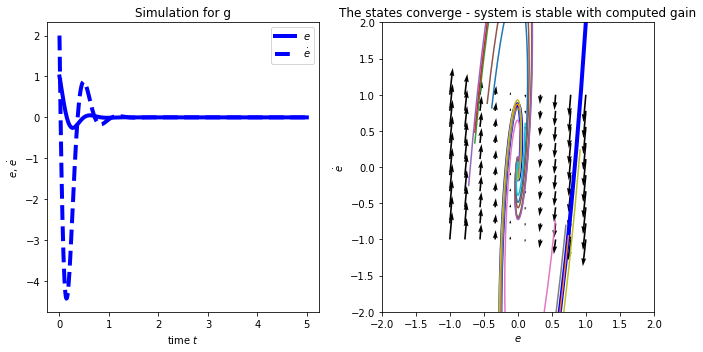

In [ ]:
Atilde = A-np.multiply(L,C)

# compute eigenvalues of Atilde
v,w = np.linalg.eig(Atilde)
print(v)
print(Atilde.shape)
# first see whether c is stable
def obs_LTI(t,e,u):
    # e = np.array(e)
    # e = np.squeeze(e)
    # print(e.shape)
    try:
      e1 = e[0]
      e2 = e[1]
      e = np.array([e1,e2])
    except:
      e1 = e[0,0]
      e2 = e[0,1]
      e = np.array([e1,e2])
    output = np.dot(e,Atilde.T)
    e = np.array([output[0], output[1]])
    return e

plt.figure(figsize=(10,5))
dt = 1e-2
# initial condition
#e10,e20 = (1.,2.)
e0 = np.array([1., 2.])

# simulation time−−
t = 5

t_,e_ = numerical_simulation(obs_LTI,t,e0,dt=dt,ut=lambda t : 0)
print(e_.shape)
e_,de_ = e_[:,0],e_[:,1]

# state vs time
ax = plt.subplot(1,2,1)
ax.set_xlabel(r'time $t$')
ax.set_ylabel(r'$e$, $\dot{e}$')
plt.plot(t_,e_,'b',lw=4,label=r'$e$')
plt.plot(t_,de_,'b--',lw=4,label=r'$\dot{e}$')
plt.legend()
plt.title('Simulation for g')

# phase portrait / "quiver" plot
ax = plt.subplot(1,2,2)
e, ed = np.meshgrid(np.linspace(-1,+1, 10), np.linspace(-1, +1, 10))
de,ded = np.asarray([obs_LTI(0.,(e,de),0.).flatten() for e,de in zip(e.flatten(),ed.flatten())]).T
de,ded = de.reshape(de.shape),ded.reshape(ed.shape)
ax.quiver(e,ed,de,ded)
ax.set_xlabel(r'$e$')
ax.set_ylabel(r'$\dot{e}$')
ax.set_ylim((-2,2))
ax.set_xlim((-2,2))
ax.plot(e_,de_,'b',lw=4)
plt.title('The states converge - system is stable with computed gain')

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  e0 = 2*(np.random.rand(2) - .5)
  t_,e_ = numerical_simulation(obs_LTI,t,e0,dt=dt,ut=lambda t : 0)
  e_,de_ = e_[:,0],e_[:,1]
  ax.plot(e_,de_)
  

plt.tight_layout()

e. Implement a simulation where you use the observer from (g.) to obtain the state estimate $\delta\widehat{x}$ that you then use in the controller from (c.) to simultaneously control the observer and system.



Text(0.5, 0, '$e(t)$')

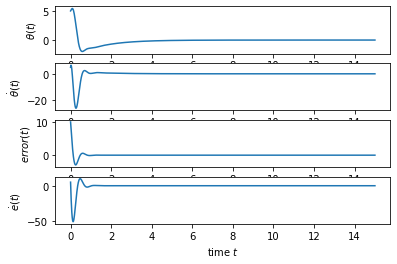

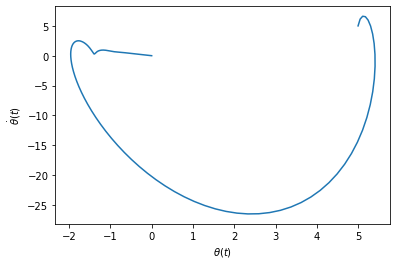

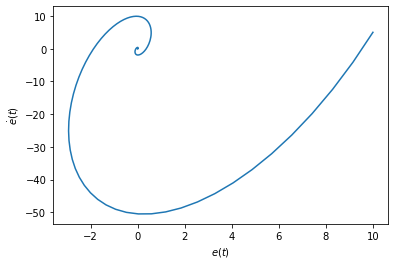

In [ ]:
# we obtain the desired eigenvalues by computing the eigenvalues of Atilde (see below)
p = [-3. + np.sqrt(5),-3. - np.sqrt(5)]
K = place(A,B,p)

K = place(A,B,p)
L = place(A.T,C.T,roots).T
T = 15
# vector field
def f_obs_LTI(t,x,u): 
  D = np.zeros([4,4])
  D[0:2,0:2] = A-np.matmul(B,K)
  D[0:2,2:4] = np.matmul(B,K)
  D[2:4,2:4] = A-np.matmul(L,C)
  return np.matmul(D, x)

# non-zero initial state
theta0 = 5.
dtheta0 = 5.
error0 = 10.
derror0 = 5.
x0 = np.array([theta0, dtheta0, error0, derror0])

# zero input
def u(t):
  ut = 0
  return ut

# numerical simulation returns:
# t_ - size N array
# x_ - size N x 2 array (since the state is 2-dimensional)
t_,x_ = numerical_simulation(f_obs_LTI,T,x0,ut=u,dt=dt)

# the first column contains theta(t), the second column contains dtheta(t)
# (I append an underscore "_" to remind myself these are time series)
theta_,dtheta_,error_,derror_ = x_[:,0],x_[:,1],x_[:,2],x_[:,3]

# we'll use the Matplotlib library for plots
# (as the name suggests, it has a similar interface to MATLAB)
import pylab as plt
plt.figure()
# plot theta
plt.subplot(4,1,1)
plt.plot(t_,theta_,label='(Linear)')
plt.ylabel(r'$\theta(t)$')

# plot dtheta
plt.subplot(4,1,2)
plt.plot(t_,dtheta_,label='(Linear)')
plt.ylabel(r'$\dot{\theta}(t)$')

# plot error
plt.subplot(4,1,3)
plt.plot(t_,error_,label='(Linear)')
plt.ylabel(r'$error(t)$')

# plot dtheta
plt.subplot(4,1,4)
plt.plot(t_,derror_,label='(Linear)')
plt.ylabel(r'$\dot{e}(t)$')
plt.xlabel(r'time $t$')

plt.figure()
plt.subplot(1,1,1)
plt.plot(theta_,dtheta_,label='(Linear)')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'${\theta}(t)$')

plt.figure()
plt.subplot(1,1,1)
plt.plot(error_,derror_,label='(Linear)')
plt.ylabel(r'$\dot{e}(t)$')
plt.xlabel(r'$e(t)$')

***Bonus:*** Implement a simulation where you apply the observer from (g.)  and controller from (c.) to the ***nonlinear*** system (nonlinear dynamics and nonlinear output equation).

(2000, 4)


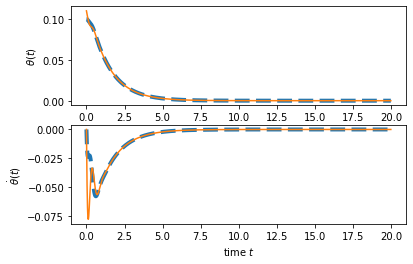

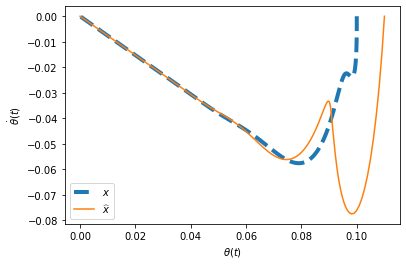

In [ ]:
# define parameters
m = 1 # kg
ell = 1 # m
g = 9.81 # m/sec/sec
gamma = 1 

A = np.array([[0,1],[g/ell, -gamma/(m*ell**2)]])
B = np.array([[0],[1/(m*ell**2)]])
C = np.array([[ell, 0]])
D = np.array([[0]])
roots = [-5+8.66*1j, -5-8.66*1j] #Enter value

k1 = m*ell*g+4*m*ell**2
k2 = 4*m*ell**2 - gamma

L = place(A.T,C.T,roots).T

def f_NL(t,x,u):
  theta = x[0]
  dtheta = x[1]
  ddtheta = g/ell*np.sin(theta) - gamma/(m*(ell**2))*dtheta + u/(m*(ell**2))  # - k1/(m*(ell**2))*theta - k2/(m*(ell**2))*dtheta
  dx = np.array([dtheta, ddtheta[0]])
  return dx

def h_NL(t,x,u):
  theta = x[0]
  dtheta = x[1]
  y = ell * np.sin(theta)
  return np.array([[y]])

def f_cl(t,z,u): 

  # extract controlled system and observer system state from full system state
  x,x_hat = z[:2],z[2:]
  #print(x_hat)
  #print(K.T)
  # compute control input using observer state
  u = -np.dot(x_hat,K.T)
  
  # output from controlled system and observer system
  y = h_NL(t,x,u)
  y_hat = ell * x_hat[0] 
  #print(y_hat)
  
  
  # dynamics of controlled system and observer system
  dx = f_NL(t,x,u)
  #print(dx)
  dx_hat = np.dot(x_hat,A.T) + np.dot(u,B.T) + np.dot(y-y_hat,L.T)
  dx_hat = np.array(dx_hat)
  dx_hat = dx_hat[0]
  # combine dynamics of controlled system and observer system
  dz = np.hstack((dx,dx_hat))
  #print(dz)
  return dz

# non-zero initial state
theta0 = 0.1
dtheta0 = 0.0
theta_hat0 = 0.11
dtheta_hat0 = 0.0
x0 = np.array([theta0, dtheta0, theta_hat0, dtheta_hat0])
T = 20
# zero input
def u(t):
  ut = 0
  return ut

# numerical simulation returns:
# t_ - size N array
# x_ - size N x 4 array (since the state is 2-dimensional)
t_,z_ = numerical_simulation(f_cl,T,x0,ut=u,dt=dt)
z_ = np.squeeze(z_)
print(z_.shape)
# the first column contains theta(t), the second column contains dtheta(t)
# (I append an underscore "_" to remind myself these are time series)
x_ = z_[:,:2]
x_hat_ = z_[:,2:]
theta_,dtheta_, = x_.T
theta_hat_,dtheta_hat_, = x_hat_.T

# we'll use the Matplotlib library for plots
# (as the name suggests, it has a similar interface to MATLAB)
import pylab as plt
plt.figure()

# plot theta, theta_hat
plt.subplot(2,1,1)
plt.plot(t_,theta_,'--',lw=4,label=r'$\theta$')
plt.plot(t_,theta_hat_,label=r'$\widehat{\theta}$')
plt.ylabel(r'$\theta(t)$')

# plot dtheta, dtheta_hat
plt.subplot(2,1,2)
plt.plot(t_,dtheta_,'--',lw=4,label=r'$\dot{\theta}$')
plt.plot(t_,dtheta_hat_,label=r'$\dot{\widehat{\theta}}$')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'time $t$')

plt.figure()
plt.subplot(1,1,1)
plt.plot(theta_,dtheta_,'--',lw=4,label=r'$x$')
plt.plot(theta_hat_,dtheta_hat_,label=r'$\widehat{x}$')
plt.ylabel(r'$\dot{\theta}(t)$')
plt.xlabel(r'${\theta}(t)$')
plt.legend();

## 2. spring-mass-damper a deux redux
Consider the following spring-mass-damper system from hw3:
![spring-mass](http://faculty.washington.edu/sburden/447/447-hw1-spring-mass.png)
The input to this system is the sinusoidal motion of the end of rightmost spring. 
Applying Newton's laws to determine the forces acting on both masses, we find two coupled second-order DE that model the system's dynamics:

$$ m\ddot{q}_1 = - c \dot{q}_1 - k q_1 + k (q_2 - q_1), $$

$$ m\ddot{q}_2 = - c \dot{q}_2 + k (u - q_2) - k (q_2 - q_1). $$

Defining $x = (q_1, \dot{q}_1, q_2, \dot{q}_2)$, we can transcribe the two coupled second-order DE obtained above into one first-order DE in matrix/vector form $\dot{x} = A x + B u$:

$$ \dot{x} = \left[ \begin{matrix} \dot{q}_1 \\ \ddot{q}_1 \\ \dot{q_2} \\ \ddot{q_2} \end{matrix} \right] = \left[ \begin{matrix} 0 & 1 & 0 & 0 \\ -\frac{2k}{m} & -\frac{c}{m}& +\frac{k}{m}  & 0 \\ 0 & 0 & 0 & 1 \\ +\frac{k}{m} & 0 & - \frac{2k}{m} & -\frac{c}{m} \end{matrix} \right] \left[ \begin{matrix} {q}_1 \\ \dot{q}_1 \\ {q_2} \\ \dot{q_2} \end{matrix} \right] + \left[ \begin{matrix} 0 \\ 0 \\ 0 \\ \frac{k}{m} \end{matrix} \right] u = A x + B u. $$

Consider the alternative choice of state vector $z = (p_1,\dot{p}_1,p_2,\dot{p}_2)$ where $p_1 = \frac{1}{2}(q_1 + q_2)$, $p_2 = \frac{1}{2} (q_1 - q_2)$.  

a. Determine the matrix $T\in\mathbb{R}^{4\times 4}$ such that $z = T x$.

**Solution:**
We can find $T$ by determining which values of $z$ match to which values of $x$. 

We know that $z=\left[ \begin{matrix} p_1 \\ \dot{p_1} \\ p_2 \\ \dot{p_2} \end{matrix} \right] = \left[ \begin{matrix} 1/2(q_1+q_2) \\ 1/2(\dot{q_1}+\dot{q_2})\\ 1/2(q_1-q_2) \\ 1/2(\dot{q_1}-\dot{q_2}) \end{matrix} \right] = Tx =T\left[ \begin{matrix} q_1 \\ \dot{q_1} \\ q_2 \\ \dot{q_2} \end{matrix} \right]$

By comparing $x$ to $z$, we can see that:

$\fbox{$T=\left[ \begin{matrix} 1/2 & 0 & 1/2 & 0 \\ 0 & 1/2 & 0 & 1/2 \\ 1/2 & 0 & -1/2 & 0 \\ 0 & 1/2 & 0 & -1/2 \end{matrix} \right] $}$


b. Determine the matrix $T^{-1}\in\mathbb{R}^{4\times 4}$ such that $x = T^{-1} z$.  (***Hint:*** solve the equations $p_1 = \frac{1}{2}(q_1 + q_2)$, $p_2 = \frac{1}{2} (q_1 - q_2)$ for $q_1$ and $q_2$ in terms of $p_1$ and $p_2$.)


**Solution:**

We can find $T^{-1}$ by rearranging the given equations for $p_1, p_2$ to solve the system of equations for $q_1, q_2$: 

$p_1=1/2(q_1+q_2) \Leftrightarrow q_2 = p_1-p_2$

$p_2 = 1/2(q_1-q_2) \Leftrightarrow q_1 = 2p_2 + q_2 = p_2 + p_1$

By differentiating, we can also obtain the values of $\dot{q_1}, \dot{q_2}$ with respect to $\dot{p_1}, \dot{p_2}$:

$\dot{q_1}=\dot{p_2}+\dot{p_1}, \dot{q_2} = \dot{p_1}-\dot{p_2}$

Finally, we can again compare and contrast $x$ to $z$ to find $T^{-1}$ such that $x=T^{-1}z$. 

$\fbox{$T^{-1}=\left[\begin{matrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{matrix}\right]$}$

-------------------------------

c. Compute $\widetilde{A} = T A T^{-1}$, $\widetilde{B} = T B$ and verify that $\dot{z} = \widetilde{A} z + \widetilde{B} u$ by comparing with the solution to problem (1d.) from homework 3.


**Solution:** 

Pick your favorite matrix multiplier to solve for 

$\widetilde{A} = T A T^{-1} = \left[ \begin{matrix} 1/2 & 0 & 1/2 & 0 \\ 0 & 1/2 & 0 & 1/2 \\ 1/2 & 0 & -1/2 & 0 \\ 0 & 1/2 & 0 & -1/2 \end{matrix} \right]\left[ \begin{matrix} 0 & 1 & 0 & 0 \\ -\frac{2k}{m} & -\frac{c}{m}& +\frac{k}{m}  & 0 \\ 0 & 0 & 0 & 1 \\ +\frac{k}{m} & 0 & - \frac{2k}{m} & -\frac{c}{m} \end{matrix} \right]\left[\begin{matrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{matrix}\right] $

$$\fbox{$\widetilde{A} = \left[\begin{matrix} 0 & 1 & 0 & 0 \\ -k/m & -c/m & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & -3k/m & -c/m \end{matrix}\right]$}$$

And similarly solve for $\widetilde{B} = TB = \left[ \begin{matrix} 1/2 & 0 & 1/2 & 0 \\ 0 & 1/2 & 0 & 1/2 \\ 1/2 & 0 & -1/2 & 0 \\ 0 & 1/2 & 0 & -1/2 \end{matrix} \right] \left[ \begin{matrix} 0 \\ 0 \\ 0 \\ \frac{k}{m} \end{matrix} \right]$

$$\fbox{$\widetilde{B} = \left[ \begin{matrix} 0 \\ \frac{k}{2m} \\ 0 \\ -\frac{k}{2m} \end{matrix} \right]$}$$

Now verify that $\dot{z}=\widetilde{A}z+\widetilde{B}u$ where $\dot{z} = \left[ \begin{matrix} \dot{p_1} \\ \ddot{p_1} \\ \dot{p_2} \\ \ddot{p_2} \end{matrix} \right]$

$\dot{z}=\widetilde{A}z+\widetilde{B}u = \left[\begin{matrix} 0 & 1 & 0 & 0 \\ -k/m & -c/m & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & -3k/m & -c/m \end{matrix}\right]\left[ \begin{matrix} z_1 \\ \dot{z}_1 \\ z_2 \\ \dot{z}_2 \end{matrix} \right]+\left[ \begin{matrix} 0 \\ \frac{k}{2m} \\ 0 \\ -\frac{k}{2m} \end{matrix} \right]u$

and comparing this solution against the solution from HW 3b, we can see that they are the same matrix.

------------------------------




d. Verify that $A$ has the same eigenvalues as $\widetilde{A}$ using parameters $m = 250$, $k = 50$, $c = 10$.

***Takeaway:***  a linear system's dynamics can be represented using different choices of state variables (also termed ***coordinates***), which changes the 
$``A"$
and 
$``B"$
matrices.  However, the eigenvalues of the $A$'s -- hence, the system's stability properties -- aren't affected by the change-of-coordinates (also termed a ***similarity transform***).

**Solution:** 

Use your favorite math solver (Wolfram Alpha, SimPy etc.) to obtain the eigenvalues of 

$\widetilde{A} = \left[\begin{matrix} 0 & 1 & 0 & 0 \\ -1/5 & -1/25 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & -3/5 & -1/25 \end{matrix}\right]$ and $A=\left[ \begin{matrix} 0 & 1 & 0 & 0 \\ -2/5 & -1/25& 1/5  & 0 \\ 0 & 0 & 0 & 1 \\ 1/5 & 0 & -2/5 & -1/25 \end{matrix} \right]$

$$\fbox{$\lambda = -0.02\pm 0.774338j, -0.02\pm 0.446766j$}$$


